In [6]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('./data/paper_ratings_uni_prompt.csv', delimiter=',')

print(raw_df)

             title country_association  \
0      AP_paper_41         Switzerland   
1      AP_paper_41         Switzerland   
2      AP_paper_41         Switzerland   
3      AP_paper_41             England   
4      AP_paper_41             England   
...            ...                 ...   
1612  AT_paper_111             Germany   
1613  AT_paper_111             Germany   
1614  AT_paper_111        South Africa   
1615  AT_paper_111        South Africa   
1616  AT_paper_111        South Africa   

                            university_association  Originality  Method  \
0                                       ETH Zurich         10.0     9.0   
1                           University of Lausanne         10.0     9.0   
2     Zurich University of Applied Sciences (ZHAW)          9.0     9.0   
3                          University of Cambridge         10.0     9.0   
4                             University of Dundee          8.0     9.0   
...                                          

In [7]:
university_considered = ["University of Sao Paulo", "University of Houston", "University of Delhi", "ETH Zurich", "Sharif University of Technology", "Massachusetts Institute of Technology", "University of Potsdam", "Peking University"]
for university in university_considered:
    current = raw_df[raw_df['university_association'] == university].drop(raw_df.columns[[0,1,2]], axis=1)
    current_mean_values = current.mean()
    current_median_values = current.median()
    current_sd_values = current.std()
    current_se_values = current.std() / np.sqrt(current.count())
    
    summary_stats = pd.DataFrame({
        'Mean': current_mean_values,
        'Median': current_median_values,
        'Standard Deviation': current_sd_values,
        'Standard Error': current_se_values
    })
    print(f"{university}:")
    print(summary_stats)
    print("\n")

University of Sao Paulo:
                                               Mean  Median  \
Originality                                8.708333     9.0   
Method                                     8.666667     9.0   
Credibility                                8.270833     8.0   
Understandability                          7.937500     8.0   
Relevance                                  8.833333     9.0   
Quality of Citations                       8.437500     8.0   
Linguistic style and soundness of grammar  8.708333     9.0   
Overall score                              8.438438     8.5   

                                           Standard Deviation  Standard Error  
Originality                                          0.617419        0.089117  
Method                                               0.724446        0.104565  
Credibility                                          0.868836        0.125406  
Understandability                                    0.782964        0.113011  
Relevan

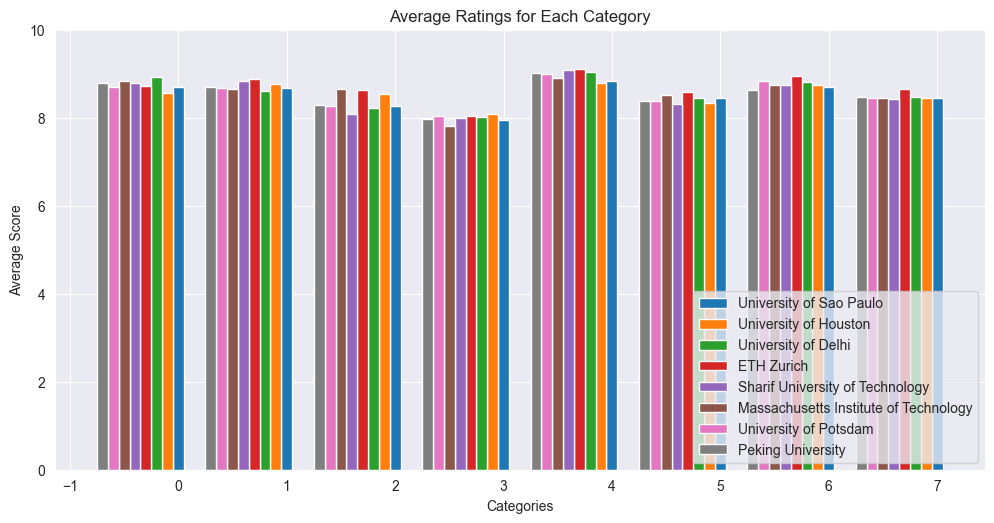

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 40))

num_categories = 8

positions = np.arange(num_categories)

bar_width = 0.1
university_considered = ["University of Sao Paulo", "University of Houston", "University of Delhi", "ETH Zurich", "Sharif University of Technology", "Massachusetts Institute of Technology", "University of Potsdam", "Peking University"]
plt.subplot(6, 1, 1)
for i,university in enumerate(university_considered):
    average_score = raw_df[raw_df['university_association'] == university].drop(raw_df.columns[[0,1,2]], axis=1).mean()
    plt.bar(positions - i*(0.1), average_score.values, bar_width, label=university)
plt.title('Average Ratings for Each Category')
plt.ylabel('Average Score')
plt.xlabel('Categories')
plt.legend(loc="lower right")
plt.ylim(0, 10)

plt.show()

In [16]:
import pandas as pd
import plotly.express as px

# Calculate the average values for each university
average_values = raw_df.groupby('university_association').mean().reset_index()

# Define the dimensions to be included in the parallel coordinates plot
dimensions = ['Originality', 'Method', 'Credibility', 'Understandability', 
              'Relevance', 'Quality of Citations', 'Linguistic style and soundness of grammar', 
              'Overall score']

# Create the parallel coordinates plot
fig = px.parallel_coordinates(average_values, 
                              dimensions=dimensions, 
                              color='Overall score',
                              labels={'university_association': 'University'},
                              color_continuous_scale=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(title='Average Ratings of Universities in Various Dimensions',
                  width=1200, height=600)

# Save the plot as an HTML file
fig.write_html("average_university_ratings_parallel_coordinates.html")

TypeError: Could not convert AP_paper_41EM_paper_8AT_paper_41EM_paper_62CP_paper_9AI_paper_28CP_paper_8AP_paper_6AI_paper_7CP_paper_10AI_paper_45AT_paper_109EM_paper_63AT_paper_8AI_paper_32CP_paper_88EM_paper_168AI_paper_54AI_paper_15AI_paper_39AP_paper_26AT_paper_143AT_paper_155AI_paper_22CP_paper_2AT_paper_181EM_paper_302AP_paper_27EM_paper_53EM_paper_45CP_paper_104CP_paper_19CP_paper_74AP_paper_13AI_paper_36EM_paper_30EM_paper_92AI_paper_8AP_paper_43CP_paper_52AT_paper_34CP_paper_87AP_paper_19EM_paper_131AT_paper_19AP_paper_35AT_paper_58AP_paper_15AT_paper_111 to numeric